# TODO Exercise 6. ex
(a) You are given a set of images hdr images. Combine the images (not necessary all) to one
image in such a way that the result image has higher quality then all given images in the
set. You can sum, subtract the images, divide by some constant, multiply by some mask,
etc.

(b) Visualise the results and explain how did you obtain them.

Solution for a, b
Base on this example:
TODO https://docs.opencv.org/4.1.0/d2/df0/tutorial_py_hdr.html


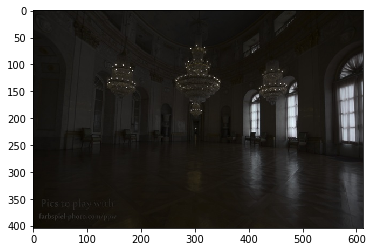

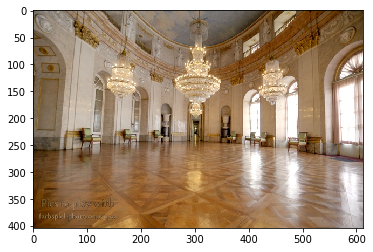

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

img_fn= ["./data/hdr_images/"+f for f in ["img01.tif", "img02.tif", "img03.tif", "img04.tif", "img05.tif"]]
img_list = [cv2.imread(fn, -1) for fn in img_fn]
exposure_times = np.array([0.0333, 0.25, 1.0, 2.5, 15.0], dtype=np.float32)

#Merge exposures into HDR image
merge_debevec = cv2.createMergeDebevec()
hdr_debevec = merge_debevec.process(img_list, times=exposure_times.copy())
merge_robertson = cv2.createMergeRobertson()
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy())

# Tonemap HDR image
tonemap1 = cv2.createTonemap(gamma=2.2)
res_debevec = tonemap1.process(hdr_debevec.copy())

# Exposure fusion using Mertens
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)
# Convert datatype to 8-bit and save
res_debevec_8bit = np.clip(res_debevec*255, 0, 255).astype('uint8')

res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
cv2.imwrite("ldr_debevec.jpg", res_debevec_8bit)
cv2.waitKey(0)
cv2.destroyAllWindows() #close the image window
img1= cv2.imread("ldr_debevec.jpg")
rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(rgb, cmap = plt.cm.Spectral)
plt.show()
cv2.imwrite("fusion_mertens.jpg", res_mertens_8bit)
cv2.waitKey(0)
cv2.destroyAllWindows() #close the image window
img2= cv2.imread("fusion_mertens.jpg")
rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(rgb, cmap = plt.cm.Spectral)
plt.show()
